In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), 117.80 MiB | 6.63 MiB/s, done.
Updating files: 100% (4/4), done.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
!pip install keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
import random
import pickle
import pandas as pd
import cv2

In [5]:
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D

In [6]:
np.random.seed(0)

In [7]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  valid_data = pickle.load(f)
X_train, Y_train = train_data['features'], train_data['labels']
X_test, Y_test = test_data['features'], test_data['labels']
X_valid, Y_valid = valid_data['features'], valid_data['labels']
print(X_train.shape)

(34799, 32, 32, 3)


In [8]:
assert(X_train.shape[0] == Y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_valid.shape[0] == Y_valid.shape[0]), "The number of images is not equal to the number of labels."
assert(X_valid.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == Y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

[180]
[180, 1980]
[180, 1980, 2010]
[180, 1980, 2010, 1260]
[180, 1980, 2010, 1260, 1770]
[180, 1980, 2010, 1260, 1770, 1650]
[180, 1980, 2010, 1260, 1770, 1650, 360]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360]
[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 9

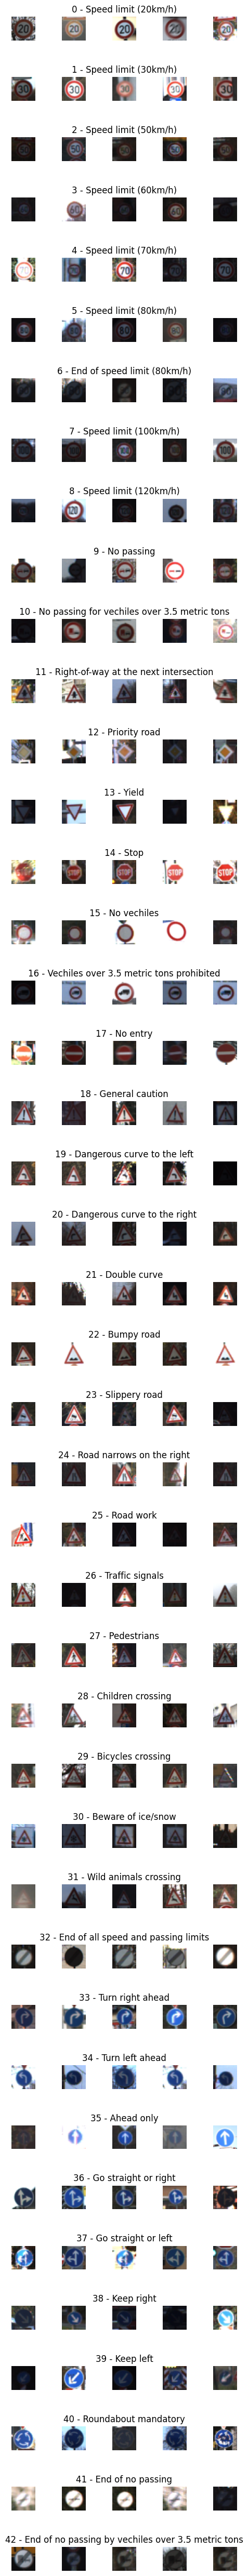

In [9]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[Y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))
        print(num_of_samples)

(32, 32, 3)
36


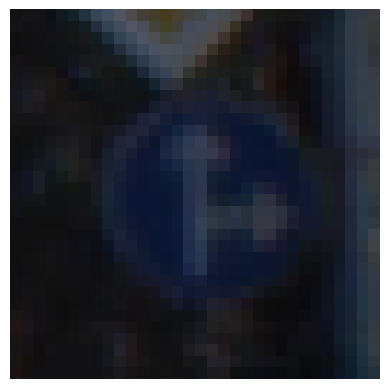

In [10]:
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(Y_train[1000])

(32, 32)


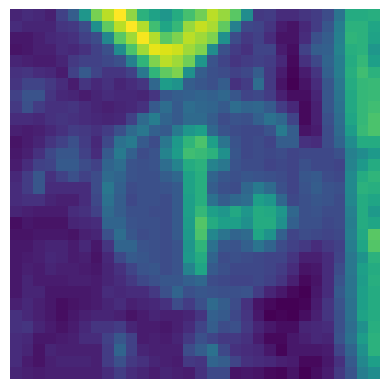

In [11]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


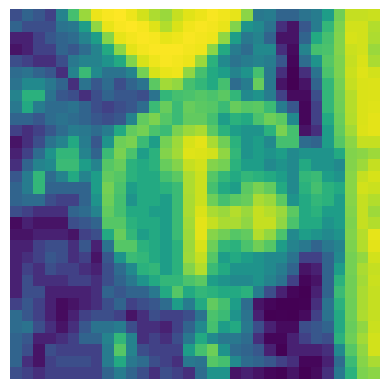

In [12]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [13]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img
X_train = np.array(list(map(preprocessing, X_train)))
X_valid = np.array(list(map(preprocessing, X_valid)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


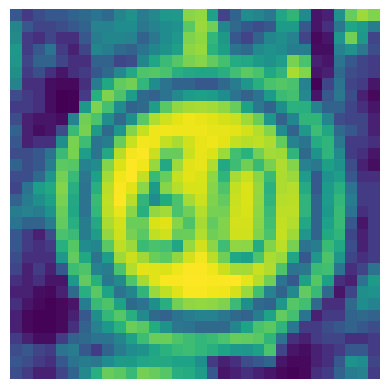

In [14]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

In [15]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_valid = X_valid.reshape(4410, 32, 32, 1)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


(15, 32, 32, 1)


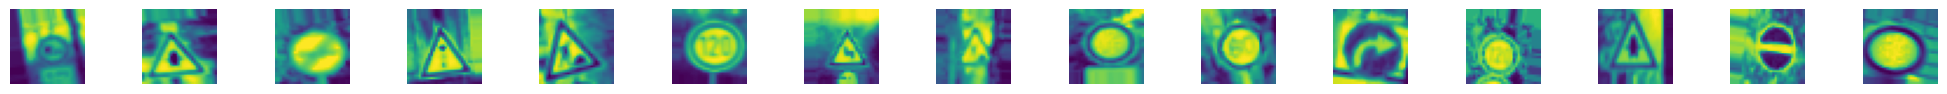

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)
# for X_batch, y_batch in

batches = datagen.flow(X_train, Y_train, batch_size = 15)
X_batch, Y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

print(X_batch.shape)

In [17]:
Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)
Y_valid = to_categorical(Y_valid, 43)

In [18]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))

  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [19]:
model = modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                   

In [20]:
history = model.fit(X_train, Y_train, epochs = 10, validation_data=(X_valid, Y_valid), batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
87/87 [==============================] - 16s 39ms/step - loss: 1.9497 - accuracy: 0.4681 - val_loss: 0.5134 - val_accuracy: 0.8580
Epoch 2/10
87/87 [==============================] - 2s 26ms/step - loss: 0.4164 - accuracy: 0.8742 - val_loss: 0.2639 - val_accuracy: 0.9215
Epoch 3/10
87/87 [==============================] - 2s 27ms/step - loss: 0.2114 - accuracy: 0.9364 - val_loss: 0.2020 - val_accuracy: 0.9367
Epoch 4/10
87/87 [==============================] - 2s 25ms/step - loss: 0.1416 - accuracy: 0.9576 - val_loss: 0.1571 - val_accuracy: 0.9508
Epoch 5/10
87/87 [==============================] - 2s 26ms/step - loss: 0.0946 - accuracy: 0.9713 - val_loss: 0.1511 - val_accuracy: 0.9544
Epoch 6/10
87/87 [==============================] - 2s 25ms/step - loss: 0.0763 - accuracy: 0.9765 - val_loss: 0.1420 - val_accuracy: 0.9549
Epoch 7/10
87/87 [==============================] - 2s 25ms/step - loss: 0.0592 - accuracy: 0.9814 - val_loss: 0.1163 - val_accuracy: 0.9651
Epoch 8/10
8

Text(0.5, 0, 'epoch')

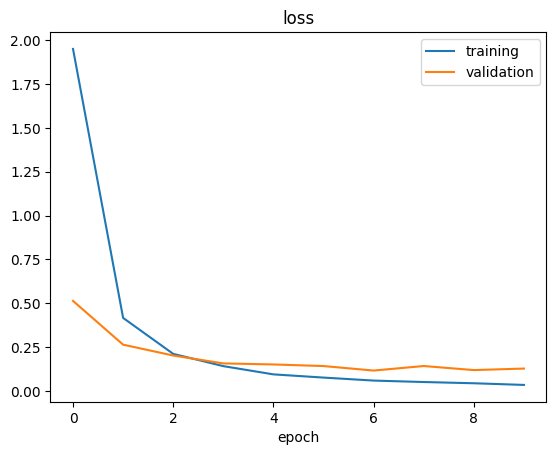

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

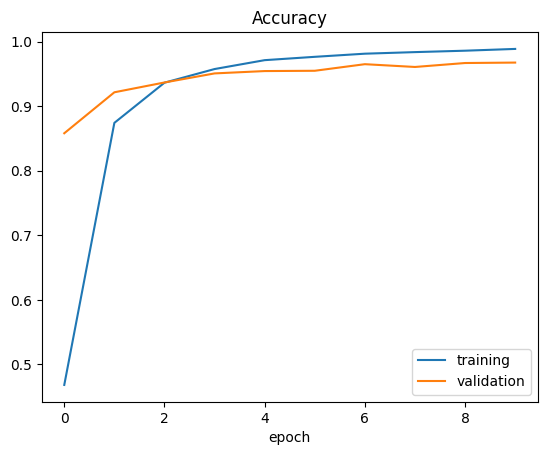

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')